Done 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets , preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

In [62]:
workoutdata = pd.read_csv('gym_members_exercise_tracking.csv')
workoutdata

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74



workoutdata['rating']=(workoutdata['rating']*10).apply(np.int64)
workoutdata

print(workoutdata['genre'].value_counts())
Filtering out non-int values in 
workoutdata['Validbudget']=workoutdata['min_temp'].str.isnumeric()
workoutdata['Validbox']=workoutdata['max_temp'].str.isnumeric()
workoutdata['Validpres']=workoutdata['pressure'].str.isnumeric()
workoutdata=workoutdata[workoutdata['Validbox'] == True]
workoutdata=workoutdata[workoutdata['Validbudget'] == True ]
workoutdata=workoutdata[workoutdata['Validpres'] == True]
workoutdata=workoutdata.iloc[: , :-3]
workoutdata

Thrilfilm=workoutdata
Thrilfilm['Indexes']=Thrilfilm['genre'].str.find("Thriller")
Thrilfilm

isthril=Thrilfilm[Thrilfilm['Indexes'] > 0]
isthril
Markdown

isthril=isthril.head(20)
workoutdata.dropna(axis=0 ,how='any',subset=['min_temp','max_temp','pressure'] , inplace=True)

In [63]:
workoutdata

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [64]:
print(workoutdata['Workout_Type'].value_counts())


Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: Workout_Type, dtype: int64


In [65]:
testdata=workoutdata
X=testdata[['Age','Session_Duration']]
y=testdata['Water_Intake (liters)']

Use Cases
1 For couaches to estimate how much liters of water are need for per hour / per age choice
2 Make an application for gym users to bring enough water with them based on time and age

In [66]:
X

,Age,Session_Duration
0,56,1.69
1,46,1.30
2,32,1.11
3,25,0.59
4,38,0.64
...,...,...
968,24,1.57
969,25,1.38
970,59,1.72
971,32,1.10


In [67]:
y = [int(label) for label in y]

Changing C seems to have no effect.
Lesser test size equals more accuracy,even if it returns to 55%
(63,61,57,55,56,55,54,55)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM classifier
svm_clf = SVC(kernel='linear', C=5)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.5753424657534246
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        44
           2       0.58      1.00      0.73       168
           3       0.00      0.00      0.00        80

    accuracy                           0.58       292
   macro avg       0.19      0.33      0.24       292
weighted avg       0.33      0.58      0.42       292

Confusion Matrix:
 [[  0  44   0]
 [  0 168   0]
 [  0  80   0]]


c:\Users\Anton\Documents\GitHub\AnalysisGroup14\analyticsDep\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\Documents\GitHub\AnalysisGroup14\analyticsDep\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\Documents\GitHub\AnalysisGroup14\analyticsDep\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [69]:
X=testdata[['Age','Session_Duration']]
X=X.values
y=testdata['Water_Intake (liters)']
y=y.apply(np.int64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_clf = SVC(kernel='linear', C=5)
svm_clf.fit(X_train, y_train)


SVC(C=5, kernel='linear')

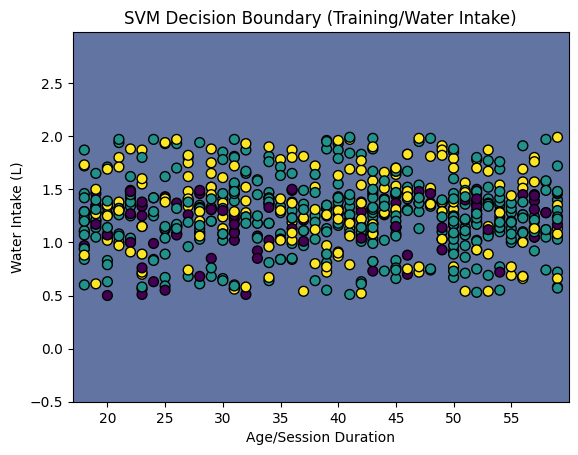

In [70]:
# Function to plot the decision boundary
def plot_decision_boundary(clf, X, y):
    h = .02  # Step size in the mesh
    x_min = X[:, 0].min() - 1  
    x_max   =X[:, 0].max() + 1
    y_min  = X[:, 1].min() - 1
    y_max=  X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.xlabel('Age/Session Duration')
    plt.ylabel('Water Intake (L)')
    plt.title("SVM Decision Boundary (Training/Water Intake)")
    plt.show()

# Plotting decision boundary
plot_decision_boundary(svm_clf, X_train, y_train)


In [71]:
X[y==2]

array([[46.  ,  1.3 ],
       [32.  ,  1.11],
       [25.  ,  0.59],
       ...,
       [23.  ,  0.58],
       [59.  ,  1.72],
       [32.  ,  1.1 ]])

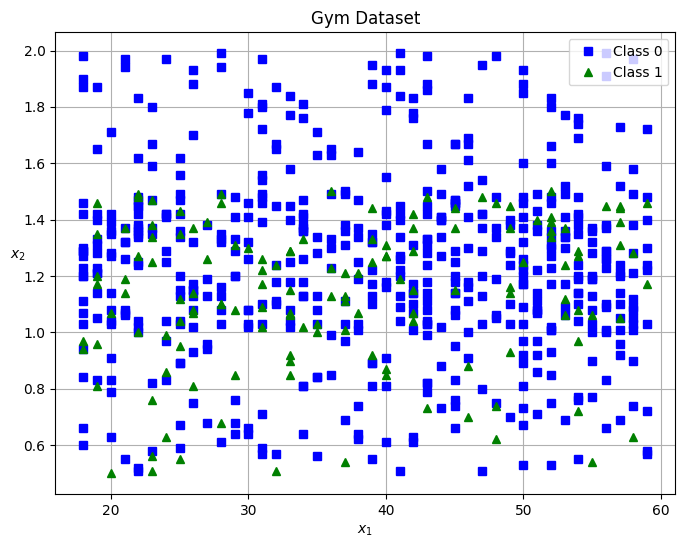

In [72]:
# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bs", label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Class 1")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation=0)
plt.title('Gym Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
y

0      3
1      2
2      2
3      2
4      2
      ..
968    3
969    3
970    2
971    2
972    3
Name: Water_Intake (liters), Length: 973, dtype: int64

In [74]:

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=15, max_iter=10000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

c:\Users\Anton\Documents\GitHub\AnalysisGroup14\analyticsDep\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=15, max_iter=10000, random_state=42))])

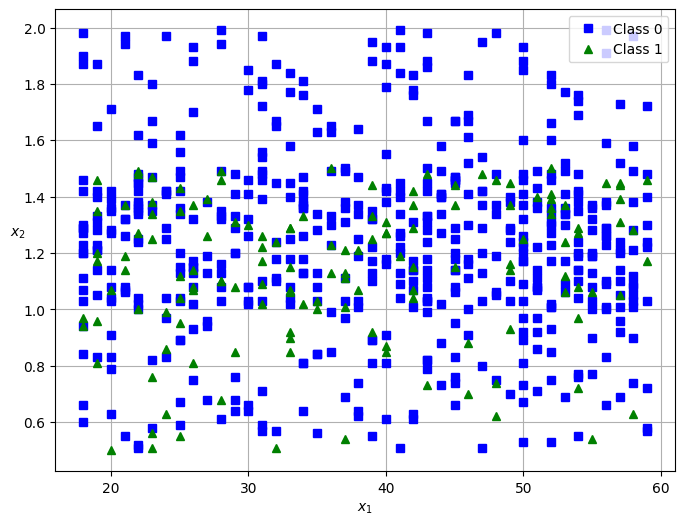

In [75]:
plt.figure(figsize=(8, 6))
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bs", label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Class 1")
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.legend()
plt.show()


In [76]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bs", label="Class 0")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Class 1")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.legend()

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 300)
    x1s = np.linspace(axes[2], axes[3], 300)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_grid).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)


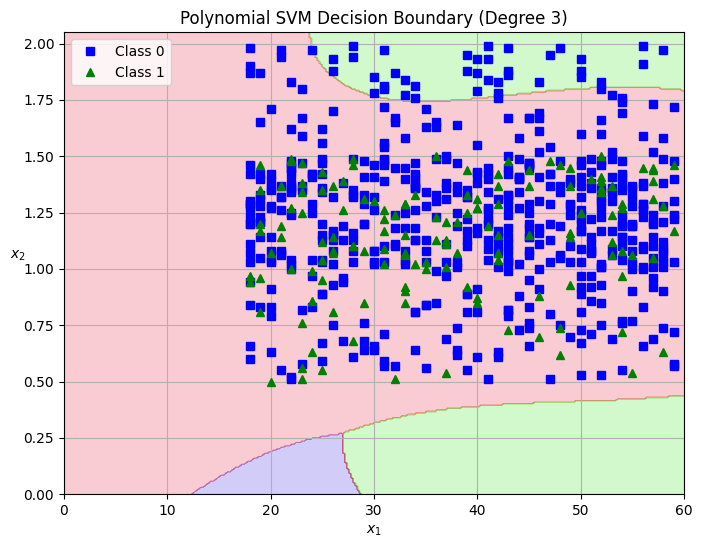

In [77]:

plt.figure(figsize=(8, 6))
plot_predictions(polynomial_svm_clf, [0, 60 ,0, 2.05 ])
plot_dataset(X, y, [0, 60 ,0, 2.05])
plt.title("Polynomial SVM Decision Boundary (Degree 3)")
plt.show()


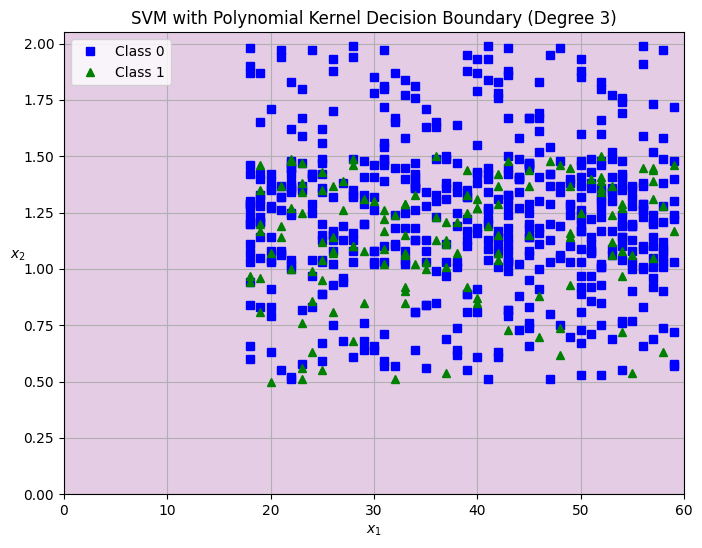

In [78]:

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=10)
)
poly_kernel_svm_clf.fit(X, y)

# Plot decision boundary for SVM with polynomial kernel
plt.figure(figsize=(8, 6))
plot_predictions(poly_kernel_svm_clf, [0, 60 ,0, 2.05 ])
plot_dataset(X, y, [0, 60 ,0, 2.05 ])
plt.title("SVM with Polynomial Kernel Decision Boundary (Degree 3)")
plt.show()

In [79]:
 #WIP Dont run
# poly100_kernel_svm_clf = make_pipeline(
#     StandardScaler(),
#     SVC(kernel="poly", degree=10, coef0=10, C=10)
# )
# poly100_kernel_svm_clf.fit(X, y)

# # Plot decision boundaries side by side
# fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

# plt.sca(axes[0])
# plot_predictions(poly_kernel_svm_clf, [0, 60 ,0, 2.05 ])
# plot_dataset(X, y, [0, 60 ,0, 2.05 ])
# plt.title("Degree=3, Coef0=1, C=5")

# plt.sca(axes[1])
# plot_predictions(poly100_kernel_svm_clf, [0, 60 ,0, 2.05 ])
# plot_dataset(X, y, [0, 60 ,0, 2.05 ])
# plt.title("Degree=10, Coef0=100, C=5")

# plt.show()


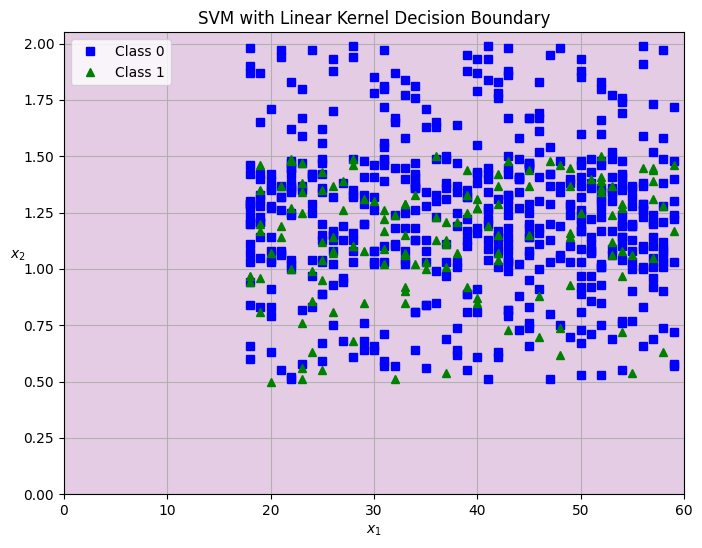

In [80]:

# Train SVM with linear kernel
svm_linear_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=1)
)
svm_linear_clf.fit(X, y)

# Plot decision boundary for linear SVM
plt.figure(figsize=(8, 6))
plot_predictions(svm_linear_clf, [0, 60 ,0, 2.05 ])
plot_dataset(X, y, [0, 60 ,0, 2.05 ])
plt.title("SVM with Linear Kernel Decision Boundary")
plt.show()
